# Atividade 3

# Atividade mínima


1- 65 pontos: Considere um circulo de raio r=1 inscrito em um quadrado de lado 2r=2. A área do círculo é π.r^2=π  A área do quadrado é 
4.A razão entre a área do círculo e a área do quadrado é π/4.Se gerarmos N pontos aleatórios uniformemente distribuídos no quadrado, a fração de pontos que cairão dentro do círculo será π/4.Assim, podemos estimar π como 4 vezes a fração de pontos que caíram dentro do círculo. Como visto em aula, pode considerar o círculo e quadrados completos, ou apenas o primeiro quadrante. Varie o número de pontos sorteados N para ver como o resultado muda. Implemente na forma de uma função com assinatura:


In [ ]:
#etapa 1:
import random

def pi_monte_carlo(N):

    dentro_circulo = 0

    for _ in range(N):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)  # Gera pontos no quadrado [-1,1] x [-1,1]
        if x**2 + y**2 <= 1:  # Verifica se o ponto está dentro do círculo de raio 1
            dentro_circulo += 1

    estimativa_pi = 4 * (dentro_circulo / N)  # Calcula a estimativa de π
    return estimativa_pi

# Teste da função com diferentes valores de N
if __name__ == "__main__":
    for N in [100, 1000, 10000, 100000]:
        print(f"N = {N}, Estimativa de π: {pi_monte_carlo(N)}")

N = 100, Estimativa de π: 3.4
N = 1000, Estimativa de π: 3.132
N = 10000, Estimativa de π: 3.1332
N = 100000, Estimativa de π: 3.14264


2- Mapa logístico, caos e fractais (etapa 1)

In [12]:
#Etapa 1- Mapa logístico, caos e fractais (etapa 1)

# Atividades intermediárias: 20 pts

 via Monte Carlo (etapa 2) Modifique sua função pi_monte_carlo(N) para que agora receba um booleando retorna_pontos que indica se a função deve retornar os pontos sorteados separados em duas listas: dentro e fora. Usando estas listas, faça um gráfico dos pontos sorteados, com os pontos dentro do círculo em azul e os pontos fora em vermelho. A assinatura da função deve ser:

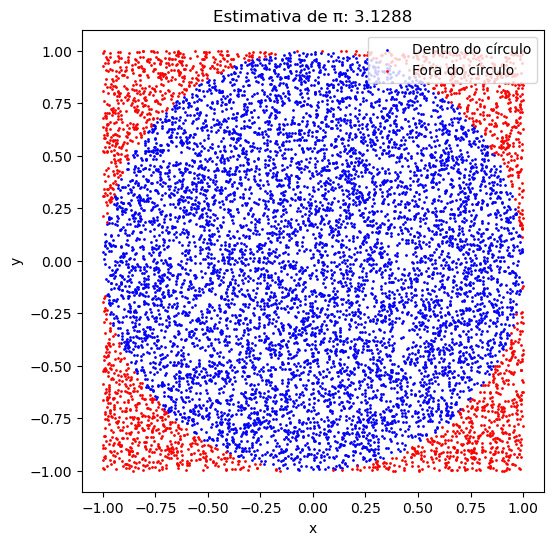

In [ ]:
#etapa 2:
import random
import matplotlib.pyplot as plt

def pi_monte_carlo(N, retorna_pontos=False):
    '''
  
    '''
    dentro = []
    fora = []
    pontos_dentro_circulo = 0

    for _ in range(N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        distancia = x**2 + y**2

        if distancia <= 1:
            pontos_dentro_circulo += 1
            dentro.append((x, y))
        else:
            fora.append((x, y))

    estimativa_pi = 4 * pontos_dentro_circulo / N

    if retorna_pontos:
        return estimativa_pi, dentro, fora
    else:
        return estimativa_pi

# Exemplo de uso:
N = 10000
estimativa_pi, dentro, fora = pi_monte_carlo(N, retorna_pontos=True)

# Plotando os pontos
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*dentro), color='blue', s=1, label='Dentro do círculo')
plt.scatter(*zip(*fora), color='red', s=1, label='Fora do círculo')
plt.title(f'Estimativa de π: {estimativa_pi:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

N =      10, π estimado = 2.800000, Erro relativo = 0.108732
N =     100, π estimado = 3.320000, Erro relativo = 0.056789
N =    1000, π estimado = 3.248000, Erro relativo = 0.033871
N =   10000, π estimado = 3.137600, Erro relativo = 0.001271
N =  100000, π estimado = 3.147000, Erro relativo = 0.001721
N = 1000000, π estimado = 3.142988, Erro relativo = 0.000444


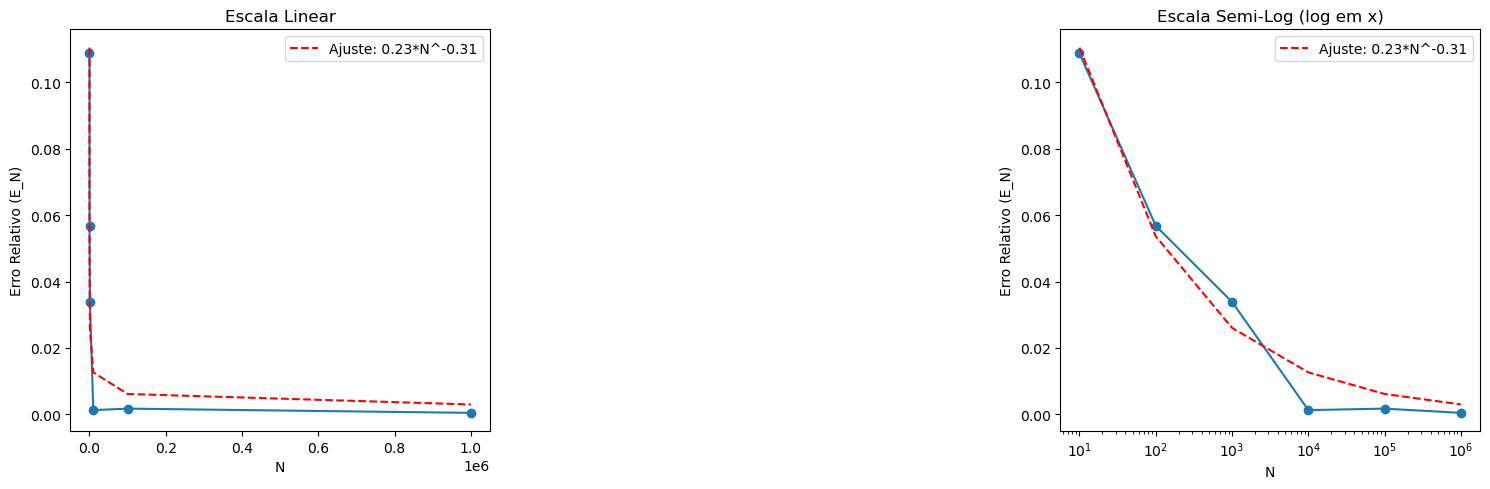

In [4]:
#Etapa 3:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def estimar_pi(N):
    """Estima π usando o método Monte Carlo com N pontos."""
    pontos = np.random.rand(N, 2)  # Gera N pontos aleatórios no quadrado [0,1]×[0,1]
    dentro = np.sum(pontos[:,0]**2 + pontos[:,1]**2 <= 1)  # Pontos dentro do 1/4 de círculo
    return 4 * dentro / N  # Estimativa de π

# Valores de N para testar
Ns = np.logspace(1, 6, 6).astype(int)  # [10^1, 10^2, ..., 10^6]
pi_estimativas = []
erros_relativos = []

# Calcula π e o erro relativo para cada N
for N in Ns:
    pi_N = estimar_pi(N)
    pi_estimativas.append(pi_N)
    erro_rel = abs(np.pi - pi_N) / np.pi
    erros_relativos.append(erro_rel)
    print(f"N = {N:7d}, π estimado = {pi_N:.6f}, Erro relativo = {erro_rel:.6f}")

# Função para ajuste dos dados (lei de potência)
def power_law(x, a, b):
    return a * x**b

# Ajuste dos dados
params, _ = curve_fit(power_law, Ns, erros_relativos)
a, b = params

# Gráficos
plt.figure(figsize=(15, 5))

# 1. Escala linear
plt.subplot(131)
plt.plot(Ns, erros_relativos, 'o-')
plt.plot(Ns, power_law(Ns, a, b), 'r--', label=f'Ajuste: {a:.2f}*N^{b:.2f}')
plt.title('Escala Linear')
plt.xlabel('N')
plt.ylabel('Erro Relativo (E_N)')
plt.legend()

# 2. Escala log-log

# 3. Escala semi-log (log no eixo x)
plt.subplot(133)
plt.semilogx(Ns, erros_relativos, 'o-')
plt.semilogx(Ns, power_law(Ns, a, b), 'r--', label=f'Ajuste: {a:.2f}*N^{b:.2f}')
plt.title('Escala Semi-Log (log em x)')
plt.xlabel('N')
plt.ylabel('Erro Relativo (E_N)')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
#via Monte Carlo (etapa 3) :
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize 

def estimar_pi(N):
    """Estima π usando o método Monte Carlo com N pontos."""
    pontos = np.random.rand(N, 2)  # Gera N pontos aleatórios no quadrado [0,1]×[0,1]
    dentro = np.sum(pontos[:,0]**2 + pontos[:,1]**2 <= 1)  # Pontos dentro do 1/4 de círculo
    return 4 * dentro / N  # Estimativa de π

# Valores de N para testar
Ns = np.logspace(1, 6, 6).astype(int)  # [10^1, 10^2, ..., 10^6]
pi_estimativas = []
erros_relativos = []

# Calcula π e o erro relativo para cada N
for N in Ns:
    pi_N = estimar_pi(N)
    pi_estimativas.append(pi_N)
    erro_rel = abs(np.pi - pi_N) / np.pi
    erros_relativos.append(erro_rel)
    print(f"N = {N:7d}, π estimado = {pi_N:.6f}, Erro relativo = {erro_rel:.6f}")

# Função para ajuste dos dados (lei de potência)
def power_law(x, a, b):
    return a * x**b

# Ajuste dos dados
params, _ = curve_fit(power_law, Ns, erros_relativos)
a, b = params

# Gráficos
plt.figure(figsize=(15, 5))

# 1. Escala linear
plt.subplot(131)
plt.plot(Ns, erros_relativos, 'o-')
plt.plot(Ns, power_law(Ns, a, b), 'r--', label=f'Ajuste: {a:.2f}*N^{b:.2f}')
plt.title('Escala Linear')
plt.xlabel('N')
plt.ylabel('Erro Relativo (E_N)')
plt.legend()

# 2. Escala log-log
plt.subplot(132)
plt.loglog(Ns, erros_relativos, 'o-')
plt.loglog(Ns, power_law(Ns, a, b), 'r--', label=f'Ajuste: {a:.2f}*N^{b:.2f}')
plt.title('Escala Log-Log')
plt.xlabel('N')
plt.ylabel('Erro Relativo (E_N)')
plt.legend()

# 3. Escala semi-log (log no eixo x)
plt.subplot(133)
plt.semilogx(Ns, erros_relativos, 'o-')
plt.semilogx(Ns, power_law(Ns, a, b), 'r--', label=f'Ajuste: {a:.2f}*N^{b:.2f}')
plt.title('Escala Semi-Log (log em x)')
plt.xlabel('N')
plt.ylabel('Erro Relativo (E_N)')
plt.legend()

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (3143408957.py, line 4)

In [ ]:
#Etapa 4:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

def pi_monte_carlo(N, retorna_pontos=False):
    '''
  
    '''
    dentro = []
    fora = []
    pontos_dentro_circulo = 0

   
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    distancia = x**2 + y**2

        
    pontos_dentro_circulo += 1
    dentro = sqrt (distancia)
    fora = (x, y)
    estimativa_pi = 4 * pontos_dentro_circulo / N

   
    return estimativa_pi, dentro, fora
    
        

# Exemplo de uso:
N = 10000
estimativa_pi, dentro, fora = pi_monte_carlo(N, retorna_pontos=True)

# Plotando os pontos
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*dentro), color='blue', s=1, label='Dentro do círculo')
plt.scatter(*zip(*fora), color='red', s=1, label='Fora do círculo')
plt.title(f'Estimativa de π: {estimativa_pi:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

IndentationError: unexpected indent (3777741698.py, line 15)

In [58]:
# via Monte Carlo (etapa 4) :
import numpy as np
import matplotlib.pyplot as plt
import time
import random

def pi_monte_carlo(N):
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)
    r = np.sqtr(x**2+y**2)
    dentro_circulo = 0
    dentro_circulo = (r<=1)


    estimativa_pi = 4 * (dentro_circulo / N)  # Calcula a estimativa de pi
    return estimativa_pi
    #testando:
N=100
print(f'N = {N}, Estimativa de pi: {pi_monte_carlo(N)}')




AttributeError: module 'numpy' has no attribute 'sqtr'

In [ ]:
#explicação do professor
def mcpi(n):
    n=100
    xy=rng.random(n,2)
    r= np.sum(xy**2, axis=1)
    return 4*np.sum(r<1)/n
print (f'mcpi')


mcpi


In [31]:
def mcpi(n):
    n=100
    xy=rng.random(n,2)
    r= np.sum(xy**2, axis=1)
    return np.sum(r<1)/n

def pi_serial (n,m):
    parcial = 0
    for i in range (m):
        parcial += mcpi_parcial (n)
    return 4*parcial/(n*m)


# Mapa Logístico:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def mapa_logistico(r, x0, N):
    """
    Calcula a evolução do mapa logístico xn+1 = r * xn * (1 - xn)

    Parâmetros:
    r - parâmetro de crescimento (0 ≤ r ≤ 4)
    x0 - condição inicial (0 < x0 < 1)
    N - número de iterações

    Retorna:
    Array com os valores de xn para n = 0 a N
    """
    xn = np.zeros(N+1)
    xn[0] = x0
    for n in range(N):
        xn[n+1] = r * xn[n] * (1 - xn[n])
    return xn

def mapa_logistico_vetorizado(r, x0, N):
    """
    Versão vetorizada do mapa logístico (mais eficiente para N grande)
    """
    xn = np.zeros(N+1)
    xn[0] = x0
    xn[1:] = r * xn[:-1] * (1 - xn[:-1])
    return xn

def plot_comportamento(r_values, x0=0.5, N=1000, show_points=200):
    """
    Plota o comportamento do mapa logístico para diferentes valores de r

    Parâmetros:
    r_values - lista de valores de r para analisar
    x0 - condição inicial
    N - número total de iterações
    show_points - número de iterações a mostrar nos gráficos
    """
    plt.figure(figsize=(14, 10))

    for i, r in enumerate(r_values, 1):
        # Calcular trajetória (usando a versão vetorizada para eficiência)
        xn = mapa_logistico_vetorizado(r, x0, N)

        plt.subplot(2, 2, i)

        if r == 2.0:
            # Para r=2.0 usamos gráfico de linhas
            plt.plot(xn[:show_points], 'b-', linewidth=1)
        else:
            # Para outros valores usamos scatter plot
            plt.scatter(range(show_points), xn[:show_points], s=5, c='r')

        plt.title(f'Mapa Logístico (r = {r})')
        plt.xlabel('Iteração (n)')
        plt.ylabel('xₙ')
        plt.grid(True)

    

C:\Users\gfm050\AppData\Local\Temp\ipykernel_3564\441410623.py:12: RuntimeWarning: overflow encountered in scalar multiply
  xn[n+1] = r * xn[n] * (1 - xn[n])


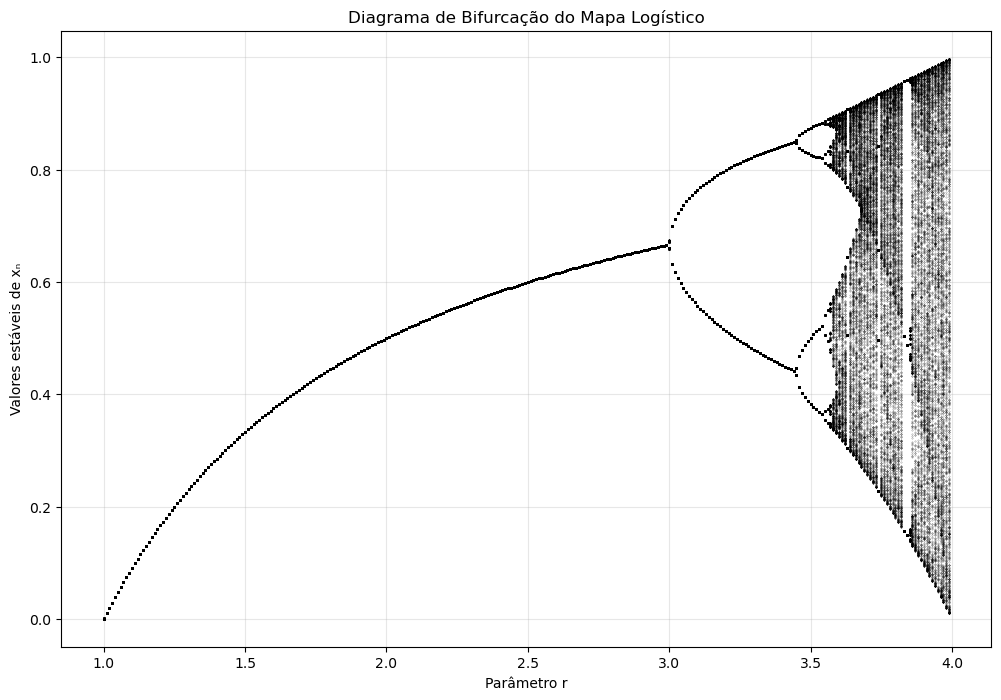

In [15]:
#caos  e fractais etapa 2:
import numpy as np
import matplotlib.pyplot as plt

def mapa_logistico(r, x0, N):
    """
    Calcula a evolução do mapa logístico xn+1 = r * xn * (1 - xn)
    """
    xn = np.zeros(N+1)
    xn[0] = x0
    for n in range(N):
        xn[n+1] = r * xn[n] * (1 - xn[n])
    return xn

# Parâmetros da simulação
N = 2000  # Número total de iterações
M = 1000   # Número de pontos a serem plotados (últimos M)
x0 = 0.5   # Condição inicial

# Configuração do gráfico
plt.figure(figsize=(12, 8))
plt.title("Diagrama de Bifurcação do Mapa Logístico")
plt.xlabel("Parâmetro r")
plt.ylabel("Valores estáveis de xₙ")
plt.grid(True, alpha=0.3)

# Loop sobre os valores de r
for r in np.arange(1.0, 4.01, 0.01):  # Passo de 0.01 para melhor resolução
    # Calcular a trajetória
    xn = mapa_logistico(r, x0, N)

    # Plotar os últimos M pontos
    plt.plot(r * np.ones(M), xn[-M:], 'k.', markersize=0.5, alpha=0.5)

plt.show()